In [2]:
import pandas
import os

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV path for file"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    joined_frame = pandas.DataFrame(index=dates)
    for symbol in symbols:
        symbol_frame = pandas.read_csv(symbol_to_path(symbol),
                                index_col="Date",
                                parse_dates=True,
                                usecols=["Date", "Adj Close"]                 
                               )
        joined_frame = joined_frame.join(symbol_frame, how="inner").rename(columns={'Adj Close': symbol})
    return joined_frame

dates = pandas.date_range("2019-04-01", "2020-04-01")
symbols = ["GOOG", "IBM", "GLD"]

data_frame = get_data(symbols, dates)
data_frame

,SPY,GOOG,IBM,GLD
2019-04-01,280.106659,1194.430054,136.905136,121.529999
2019-04-02,280.243835,1200.489990,136.618515,121.980003
2019-04-03,280.684845,1205.920044,137.220383,121.800003
2019-04-04,281.429596,1215.000000,136.408325,122.110001
2019-04-05,282.791809,1207.150024,136.886017,121.980003
...,...,...,...,...
2020-03-19,239.103989,1115.290039,100.339996,138.039993
2020-03-20,228.800003,1072.319946,95.389999,140.110001
2020-03-23,222.949997,1056.619995,94.769997,146.300003
2020-03-24,243.149994,1134.459961,105.480003,153.399994


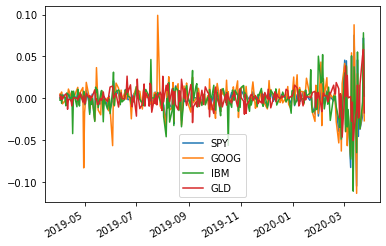

In [3]:
scaled_frame = data_frame / data_frame.values[0]
daily_returns = scaled_frame[1:] - scaled_frame.values[0:-1]
daily_returns.plot()

Kurtosis 12.642602961688834 7.451907100496496
std 0.04295498389535815 0.052569867670869797
mean -0.0011845420574043033 -0.0007558742690438056


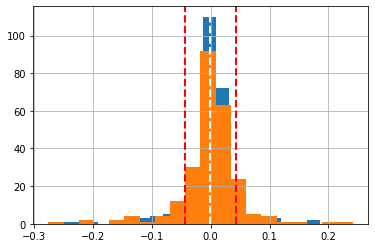

In [34]:
# from matplotlib import pyplot

daily_returns["SPY"].hist(bins=20, label="SPY")
daily_returns["GOOG"].hist(bins=20, label="GOOG")
mean = daily_returns['SPY'].mean()
std = daily_returns['SPY'].std()

pyplot.axvline(mean, color='w', linestyle='dashed', linewidth=2)
pyplot.axvline(-std, color='r', linestyle='dashed', linewidth=2)
pyplot.axvline(std, color='r', linestyle='dashed', linewidth=2)
print("Kurtosis", daily_returns['SPY'].kurtosis(), daily_returns['GOOG'].kurtosis())
print("std", std, daily_returns['GOOG'].std())
print("mean", mean, daily_returns['GOOG'].mean())

Gold Alpha 0.003169374625015419
Google Alpha 0.00042761977558633166


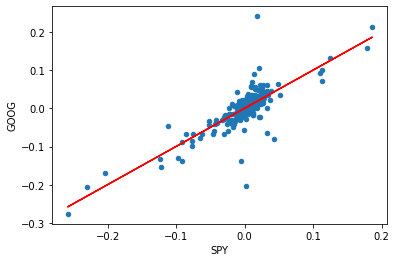

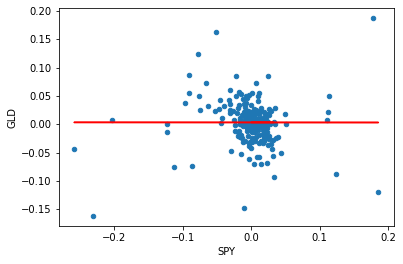

In [40]:
import numpy

daily_returns.plot(kind='scatter', x='SPY', y='GOOG')
beta_google, alpha_google = numpy.polyfit(daily_returns['SPY'], daily_returns['GOOG'], 1)
pyplot.plot(daily_returns['SPY'], beta_google * daily_returns['SPY'] + alpha_google, '-', color='r')
pyplot.show

daily_returns.plot(kind='scatter', x='SPY', y='GLD')
beta_gold, alpha_gold = numpy.polyfit(daily_returns['SPY'], daily_returns['GLD'], 1)
pyplot.plot(daily_returns['SPY'], beta_gold * daily_returns['SPY'] + alpha_gold, '-', color='r')
pyplot.show

print("Gold Alpha", alpha_gold)
print("Google Alpha", alpha_google)